## Recreation Centers 

#### Completed by Dean and Logan

Recreation centers are hubs for athletes and athletic activity in communities. This metric is incredibly important for finding which neighborhood is best suited for atheletes. We chose to make pools and recreation centers fall under the same category because most of the recreation centers were called "pool/rec centers" in the data set. This approach ensures a comprehensive assessment of athletic amenities across neighborhoods.

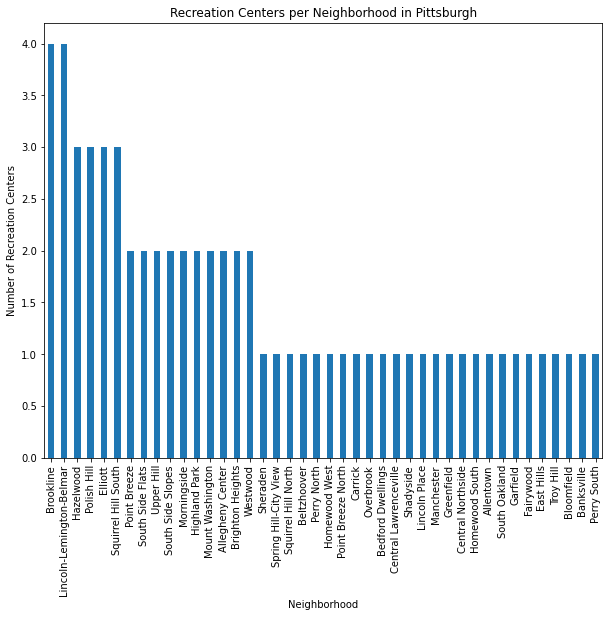

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('rec-center.csv')

keywords= ['Pool', 'Rec Center', 'Recreation Center','Recreation', 'Rec', 'Community', 'Activity']

filteredDf= df[df['type'].str.contains('|'.join(keywords), case=False, na=False)]

count= filteredDf['neighborhood'].value_counts()

plt.figure(figsize=(10, 8))
count.plot(kind= 'bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Recreation Centers')
plt.title('Recreation Centers per Neighborhood in Pittsburgh')
plt.show()


This is a bar graph of Recreation Centers in their respective Pittsburgh neighborhoods. This metric was a bit trickier to do because the original CSV file included many different types of municipality buildings. In order to sort through this unwanted data and create the bar graph seen above, I used a list of keywords to narrow down the search. Lincoln-Lemington-Belmar and Brookline are our two front runners.

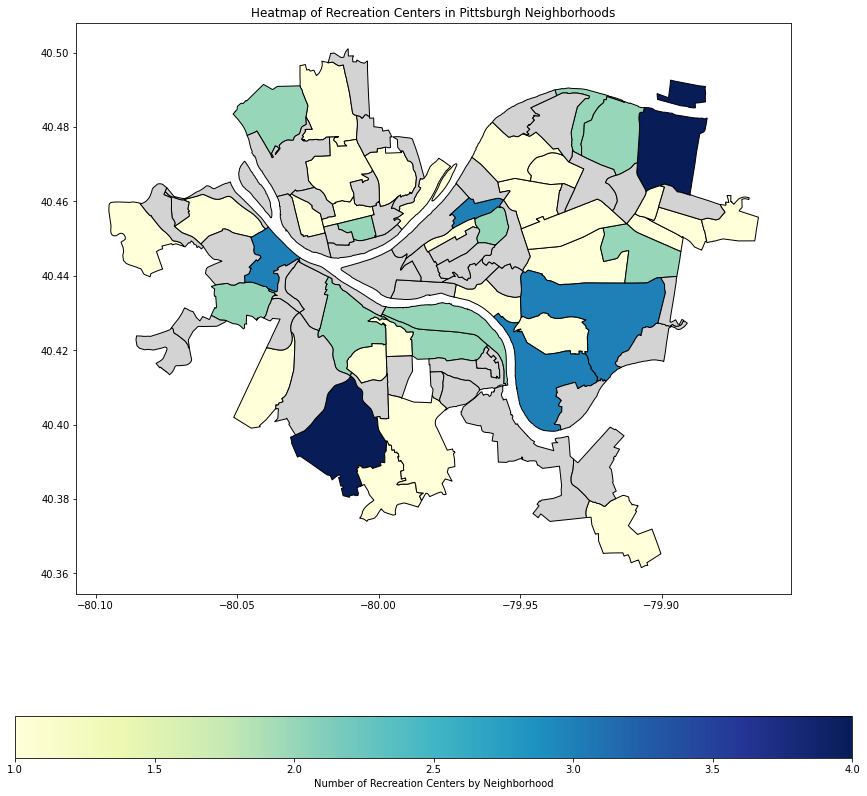

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

mapOfPittsburgh= gpd.read_file('Neighborhoods_.shp')

df= pd.read_csv('rec-center.csv')

keywords_list =['Pool', 'Rec Center', 'Recreation Center','Recreation', 'Rec', 'Community', 'Activity']

filteredDf= df[df['type'].str.contains('|'.join(keywords_list), case=False, na=False)]

count= filteredDf['neighborhood'].value_counts().reset_index()
count.columns = ['Neighborhood', 'Count']

merge= mapOfPittsburgh.merge(count,left_on='hood',right_on='Neighborhood', how='left')

fig,plot_area= plt.subplots(figsize=(15, 15))
merge.plot(column='Count',ax=plot_area, legend=True, cmap='YlGnBu', edgecolor='black',
                          legend_kwds={'label': "Number of Recreation Centers by Neighborhood", 'orientation': "horizontal"}, missing_kwds={'color': "lightgrey"})

plt.title('Heatmap of Recreation Centers in Pittsburgh Neighborhoods')
plt.show()


This heatmap helps shows exactly where the neighborhoods of interest are located. As you move to the right towards dark blue on the color gradient, a higher concentration of courts and rinks can be seen. In this map, there are a lot of neighborhoods that do not even have 1 recreation center, making them automatically unfit for selection. Lincoln-Lemington-Belmar and Brookline stand out as front-runners for this category.

#### Conclusion

Based on the bar graph and heatmap, we believe that Lincoln-Lemington-Belmar or is the optimal choice for athletes. While there are multiple other neighborhoods that come close 